<a href="https://colab.research.google.com/github/alaahossam/AM-and-FM-modulation/blob/master/Sheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sheet 3**

# 2)Spectral clustering 

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel

In [42]:
k=3
gamma1=0.01
gamma2=0.1
gamma3=1
gamma4=10
data=np.asarray([[3,3],[2,4],[3,4],
      [5,4],[5,6],[5,8],
      [6,4],[6,5],[6,7],
      [7,3],[7,4],[8,2],
      [9,4],[10,6],[10,7],
      [10,8],[11,5],[11,8],
      [12,7],[13,6],[13,7],
      [14,6],[15,4],[15,5]])

# **Computing similarity matrix**

#a)using rbf kernel

In [135]:
A=rbf_kernel(data,gamma=gamma1)
B=rbf_kernel(data,gamma=gamma2)
C=rbf_kernel(data,gamma=gamma3)
D=rbf_kernel(data,gamma=gamma4)
E=rbf_kernel(data,gamma=25)

# b)using 3NN classifier 

[0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


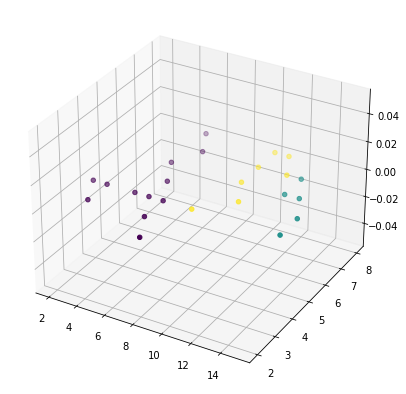

In [126]:
km=KMeans(n_clusters=3)
y=km.fit_predict(data)
print(y)
plt.figure(figsize=(10,7))
ax = plt.axes(projection ="3d")
ax.scatter3D(data[:,0],data[:,1],c=y)

In [102]:
def spectral_cluster(A):
#x is the Degree matrix
  D = A.sum(axis=1)
  D_inv=1/D
#print("D^-1")
#print(D_inv)

#Laplacian matrix
  L = D - A 
#print(L)

#La matrix
  La=np.multiply(D_inv[ np.newaxis, : ] , np.multiply(A,D_inv[:,np.newaxis]))
#print(La)

#Eigen vectors decomposition
  eigen_values , eigen_vectors = np.linalg.eigh(La)
  sorted = np.argsort(eigen_values)[0:3:1]
#print(sorted)
  eigen_values= eigen_values[sorted]
#print(eigen_values)
  eigen_vectors = eigen_vectors[:, sorted]
#print(eigen_vectors)
  norm=normalize(eigen_vectors)
  #print(norm)
  Y= KMeans(n_clusters=3).fit_predict(normalize(eigen_vectors))
#print(Y)
  plt.figure(figsize=(10,7))
  ax = plt.axes(projection ="3d")
  ax.scatter3D(data[:,0],data[:,1],c=Y)

# **3D scatter for normalized eigen vectors**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


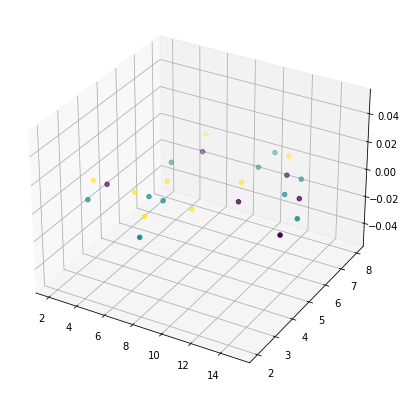

In [103]:
spectral_cluster(A)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


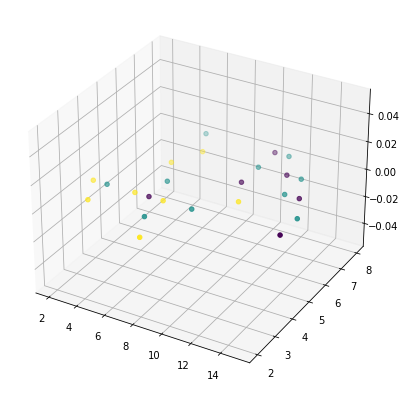

In [87]:
spectral_cluster(B)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


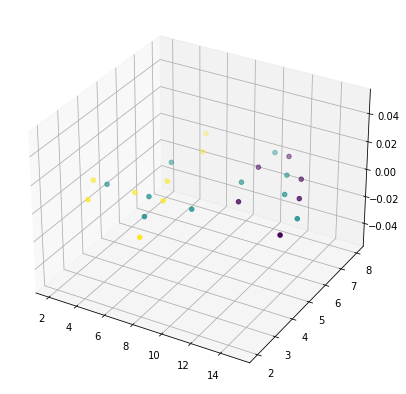

In [90]:
spectral_cluster(C)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


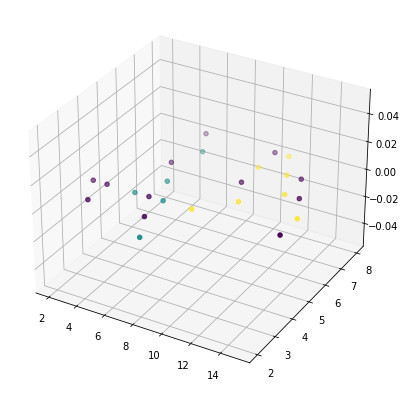

In [91]:
spectral_cluster(D)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


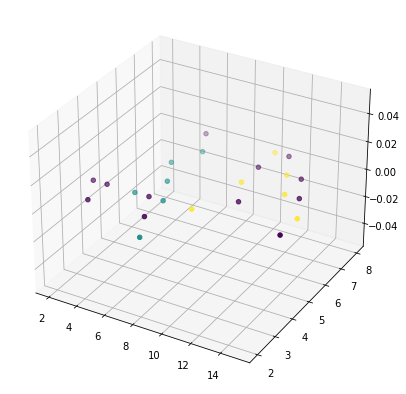

In [136]:
spectral_cluster(E)

**Which gamma value gives a connected graph ?** gamma = 10 , the graph is less connected beacue the accuracy is getting higher. and at gamma = 0.01 , the graph is more connected.  Note that if gamma is very high , the accuracy will be low again